In [66]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import plot_roc_curve

In [2]:
### Loading Dataset
wine_df = pd.read_csv(r"C:/Users/swati/Downloads/DSData-master/DSData-master/winequality-red.csv")

In [3]:
## Checking some of data using head method:-
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
## Checking shape of data:-
wine_df.shape

(1599, 12)

In [5]:
## Checking data types using info() method:-
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see ,all columns data types are float or int and there are not any null values present.

In [6]:
###Checking for null values using isnull() method also:-

wine_df.isnull().sum()    

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are not any null values present in any columns.

In [7]:
### checking more information about data:-
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
### Checking Dependent column i.e; quality unique values:-
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:>

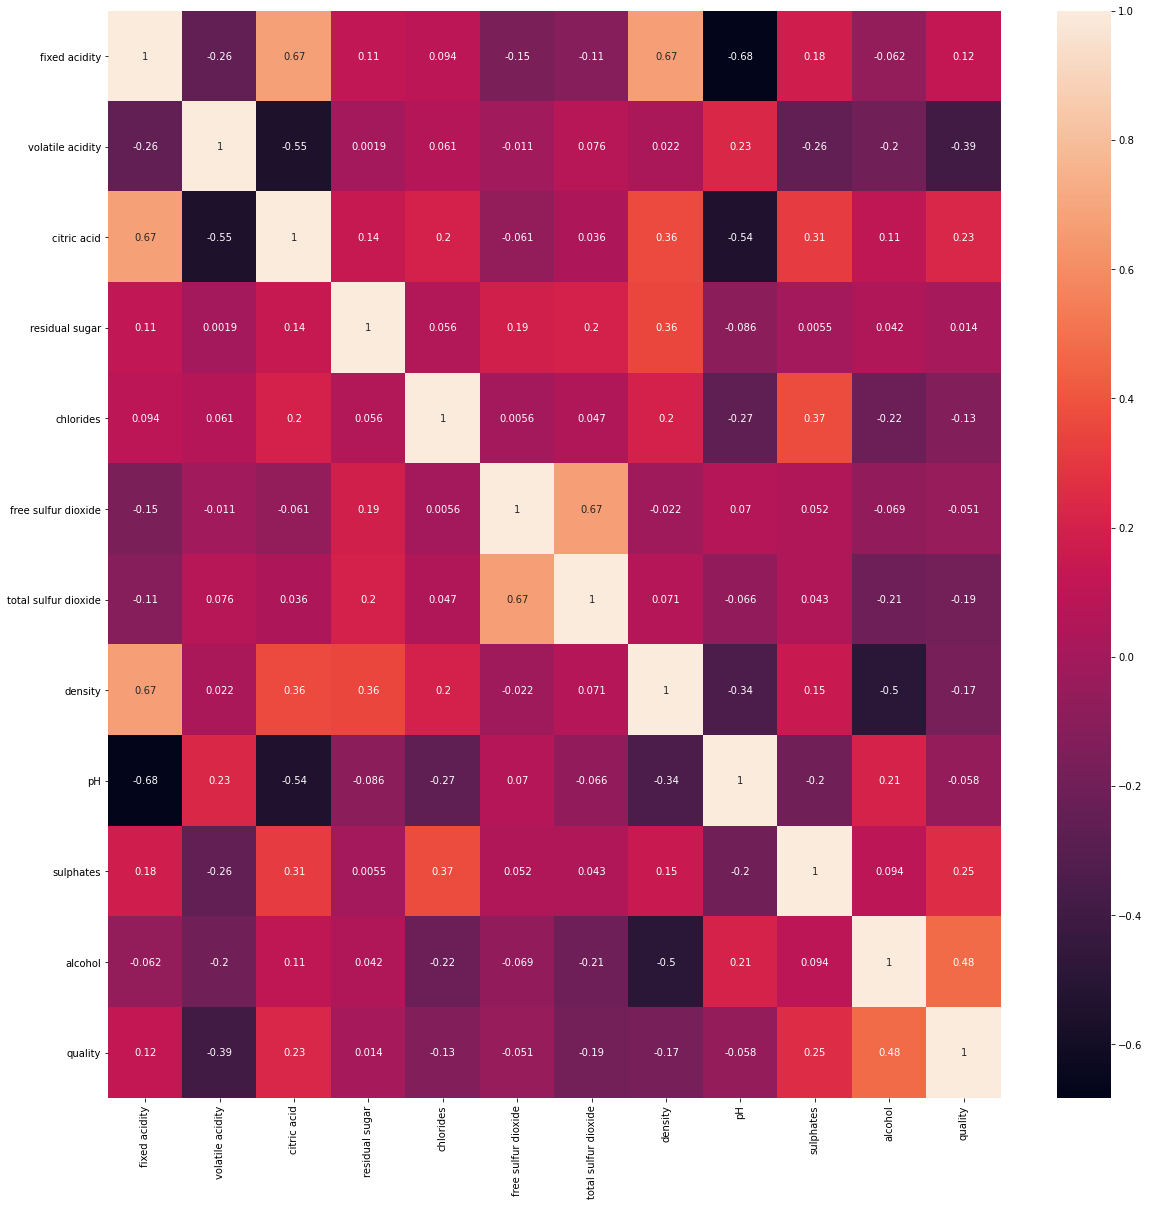

In [9]:
### Checking correlation:-
plt.figure(figsize=(20,20))
sns.heatmap(wine_df.corr(),annot =True)

In [10]:
## Checking coefficient of correlation with target column:-
wine_df.corr()['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

As we can see 7 columns have very less correlation with target column less than .01

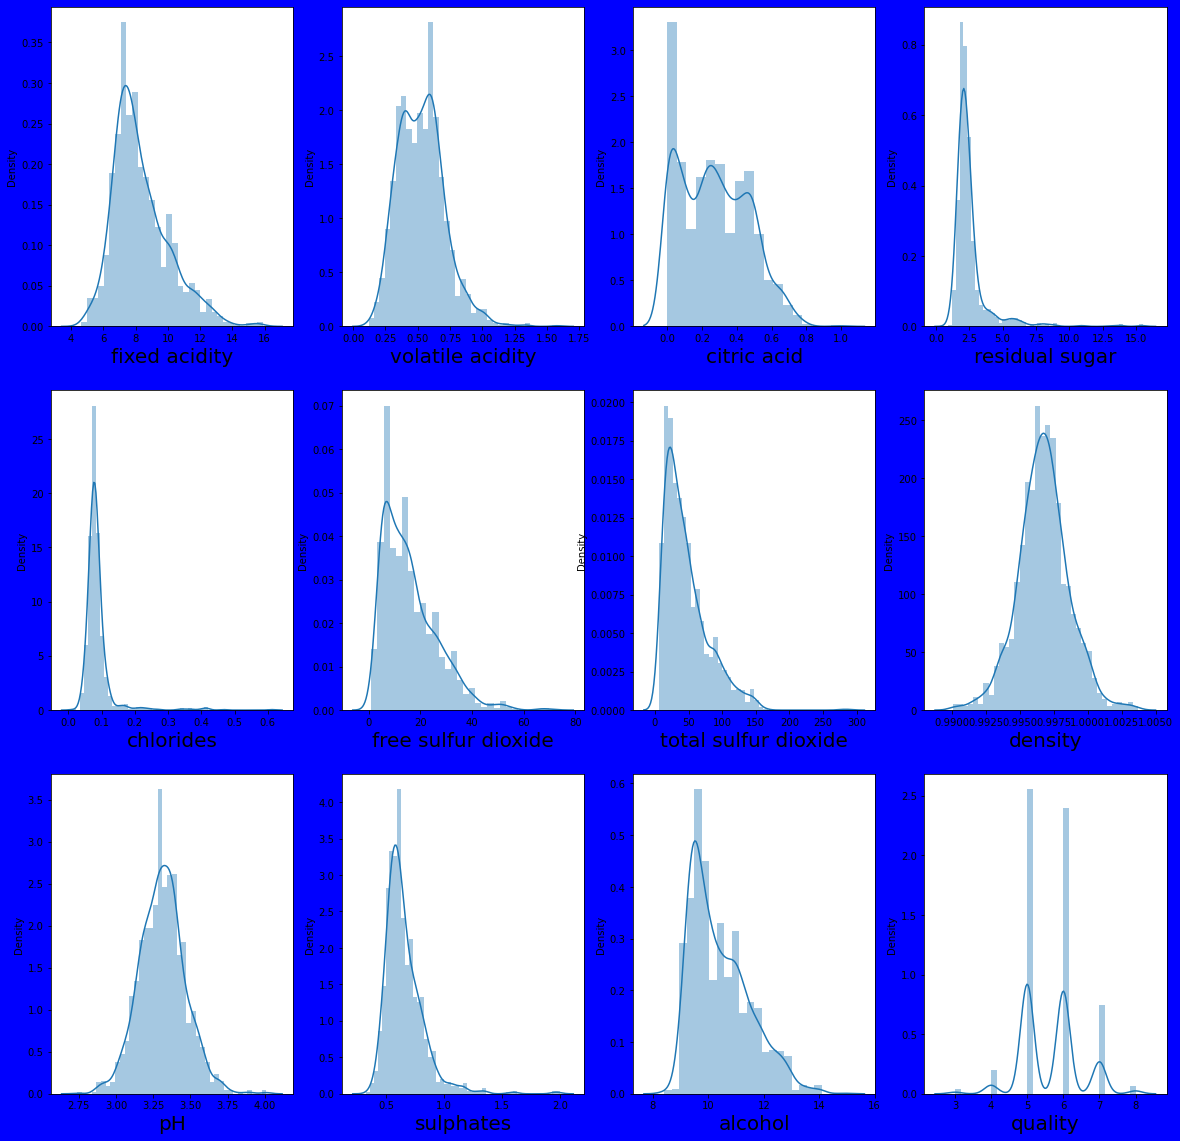

In [11]:
#### Now checking distribution of data with in columns:
plt.figure(figsize=(20,20),facecolor = 'blue')
plotnumber = 1
for column in wine_df:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(wine_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()    

As above dist plot we can see almost every column has skewness.So will remove skewness.

In [12]:
### First making binary classifier
bins = (2,6.5,8)
quality_names =['good','bad']
wine_df['quality']=pd.cut(wine_df['quality'],bins=bins,labels =quality_names)


In [13]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,good


In [14]:
##Now encoding quality as continous data:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_df['quality'] = le.fit_transform(wine_df['quality'])

In [15]:
wine_df['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

here 0 for bad quality and 1 for good quality.We can check it using inverse_transform method.

In [16]:
le.inverse_transform([1,0])

array(['good', 'bad'], dtype=object)

In [17]:
## Checking skewness
wine_df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -2.129363
dtype: float64

Since quality is label ,so we'll ignore skewness for that column.AS we can see most of the columns have skewness specially residual sugar and chlorides have very high skewness.

In [19]:
## Applying power transform to remove skewness:-
from sklearn.preprocessing import power_transform
x_new = power_transform(wine_df)
x = pd.DataFrame(x_new,columns = wine_df.columns)

In [20]:
x.shape

(1599, 12)

In [22]:
### Again checking skewness after applying power_transform:-
x.skew().sort_values(ascending = False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
quality                -2.129363
dtype: float64

So we can see except label column all columns are in +/- 0.5 range.

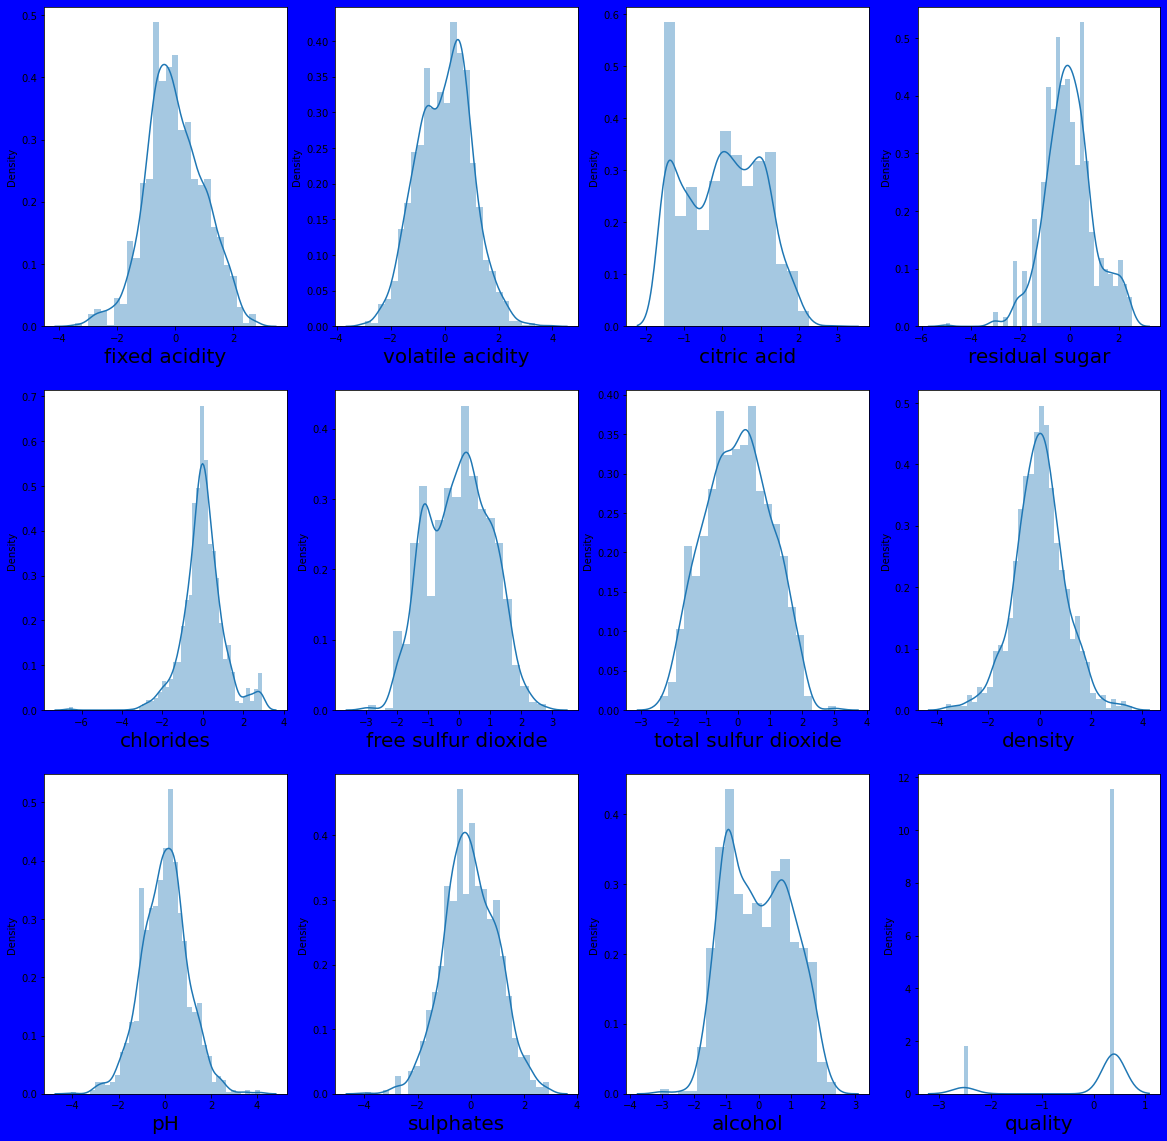

In [23]:
###After skewness removal distribution of data in columns:-
plt.figure(figsize=(20,20),facecolor = 'blue')
plotnumber = 1
for column in x:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()    

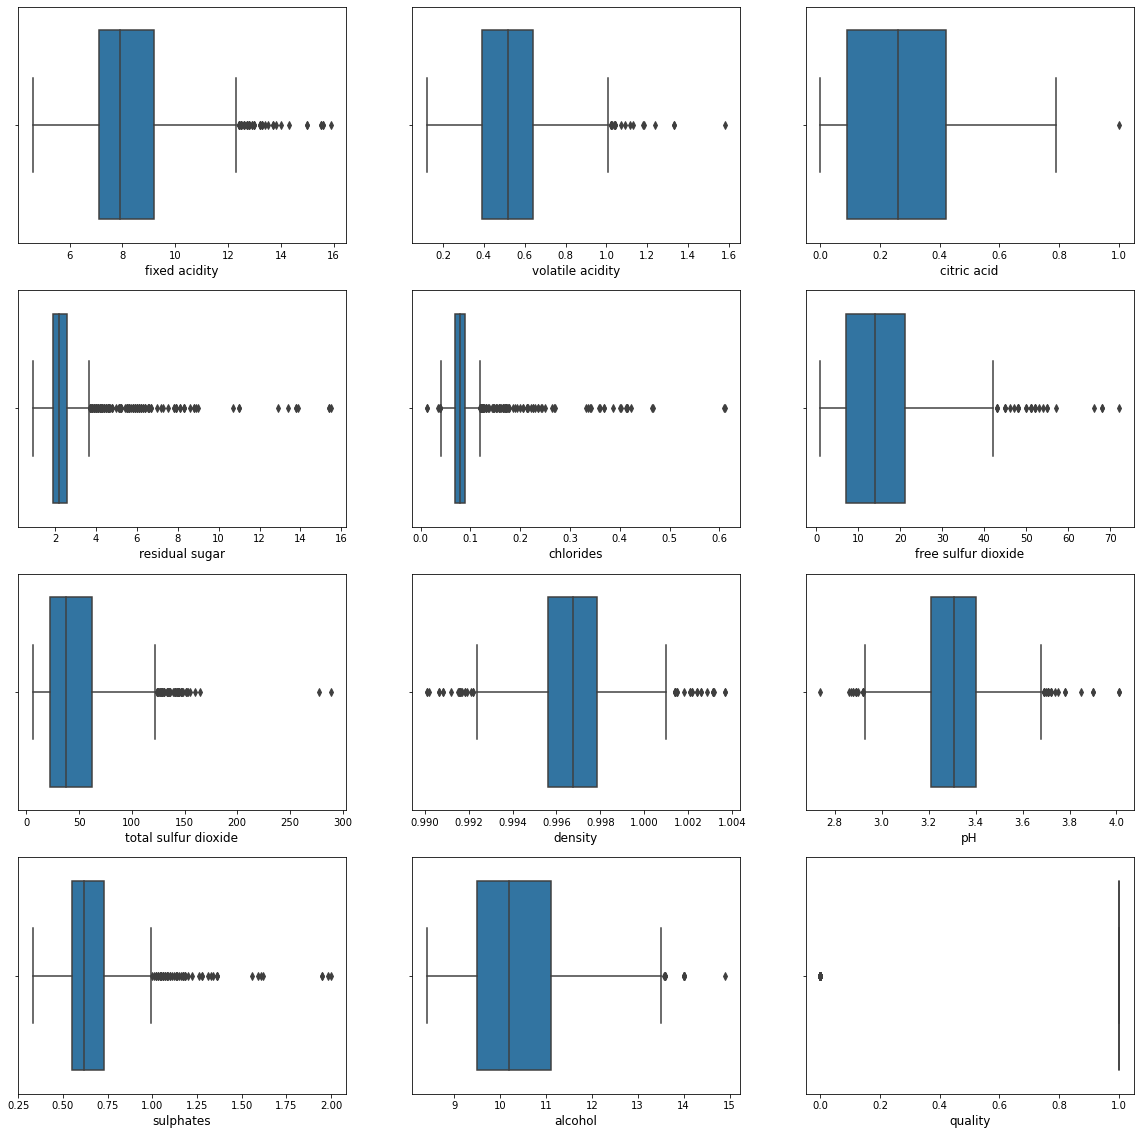

In [24]:
### Visualizing outliers using boxplot:-
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber <= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(wine_df[column],orient='v')
        plt.xlabel(column,fontsize=12)
        plotnumber +=1
plt.show()        

In [25]:
## Removing outliers using zscore:-
from scipy.stats import zscore
z_score = zscore(wine_df[['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','density','pH','sulphates']])
abs_zscore=np.abs(z_score)
new_data =( abs_zscore < 3).all(axis=1)
wine_df = wine_df[new_data]
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000
mean,8.299255,0.523509,0.263997,2.394546,0.081564,15.424119,44.070461,0.996701,3.317507,0.643178,10.429709,0.861111
std,1.653296,0.169551,0.191340,0.871204,0.021475,9.879357,29.651377,0.001738,0.142229,0.130163,1.041354,0.345948
min,4.900000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.320000,0.620000,10.200000,1.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,59.000000,0.997800,3.400000,0.720000,11.100000,1.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,57.000000,145.000000,1.002200,3.750000,1.160000,14.000000,1.000000


In [28]:
wine_df.shape

(1476, 12)

In [29]:
## Percentage loss of data:-
loss_percent =((1599-1476)/1599) * 100
loss_percent

7.6923076923076925

# Separating features and label:-

In [30]:
x = wine_df.drop('quality',axis=1)
y=wine_df['quality']

In [32]:
## Since all tha values are not in same range so Scaling the data using Standard Scaler:-
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [34]:
x_scaler.shape

(1476, 11)

In [35]:
y.shape

(1476,)

In [36]:
## Finding best random state:-
maxAcc = 0
maxrs =0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.20,random_state =i)
    lgr = LogisticRegression()
    lgr.fit(x_train,y_train)
    pred_test = lgr.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    
    if acc >maxAcc:
        maxAcc=acc
        maxrs=i
print("Best Accuracy is :",maxAcc,"at random state",maxrs)        

Best Accuracy is : 0.9222972972972973 at random state 57


# Creating train test split

In [ ]:
 x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.20,random_state =57)


In [37]:
x_train.shape

(1180, 11)

In [38]:
y_train.shape

(1180,)

In [39]:
x_test.shape

(296, 11)

In [40]:
y_test.shape

(296,)

# LogisticRegression

In [41]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
pred_lgr = lgr.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_lgr))
print(confusion_matrix(y_test,pred_lgr))
print(classification_report(y_test,pred_lgr))

Accuracy Score :  0.8716216216216216
[[ 15  28]
 [ 10 243]]
              precision    recall  f1-score   support

           0       0.60      0.35      0.44        43
           1       0.90      0.96      0.93       253

    accuracy                           0.87       296
   macro avg       0.75      0.65      0.68       296
weighted avg       0.85      0.87      0.86       296



# DecisionTree Classifier

In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test) 
print("Accuracy Score : ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

Accuracy Score :  0.8648648648648649
[[ 26  17]
 [ 23 230]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.57        43
           1       0.93      0.91      0.92       253

    accuracy                           0.86       296
   macro avg       0.73      0.76      0.74       296
weighted avg       0.87      0.86      0.87       296



# RandomForest Classifier

In [45]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test) 
print("Accuracy Score : ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

Accuracy Score :  0.8952702702702703
[[ 21  22]
 [  9 244]]
              precision    recall  f1-score   support

           0       0.70      0.49      0.58        43
           1       0.92      0.96      0.94       253

    accuracy                           0.90       296
   macro avg       0.81      0.73      0.76       296
weighted avg       0.89      0.90      0.89       296



# KNeighbors Classifier

In [48]:
knc.fit(x_train,y_train)
pred_knc = knc.predict(x_test) 
print("Accuracy Score : ",accuracy_score(y_test,pred_knc))
print(confusion_matrix(y_test,pred_knc))
print(classification_report(y_test,pred_knc)) 

Accuracy Score :  0.8682432432432432
[[ 17  26]
 [ 13 240]]
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        43
           1       0.90      0.95      0.92       253

    accuracy                           0.87       296
   macro avg       0.73      0.67      0.70       296
weighted avg       0.85      0.87      0.86       296



# SVM

In [50]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test) 
print("Accuracy Score : ",accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc)) 


Accuracy Score :  0.8851351351351351
[[ 12  31]
 [  3 250]]
              precision    recall  f1-score   support

           0       0.80      0.28      0.41        43
           1       0.89      0.99      0.94       253

    accuracy                           0.89       296
   macro avg       0.84      0.63      0.68       296
weighted avg       0.88      0.89      0.86       296



# Cross Validation of all models:-

In [52]:
cvs= cross_val_score(lgr,x_scaler,y,cv=5)
print("Cross Validation of Logistic Regression model ",cvs.mean())

Cross Validation of Logistic Regression model  0.8678905176362803


In [53]:
cvs1= cross_val_score(dtc,x_scaler,y,cv=5)
print("Cross Validation of Decision Tree Classifier model ",cvs1.mean())

Cross Validation of Decision Tree Classifier model  0.8211016949152542


In [54]:
cvs2= cross_val_score(rfc,x_scaler,y,cv=5)
print("Cross Validation of Random Forest Classifier model ",cvs2.mean())

Cross Validation of Random Forest Classifier model  0.8705909299129638


In [55]:
cvs3= cross_val_score(knc,x_scaler,y,cv=5)
print("Cross Validation of KNeighbors Classifier model ",cvs3.mean())

Cross Validation of KNeighbors Classifier model  0.8475492441594137


In [57]:
cvs4= cross_val_score(svc,x_scaler,y,cv=5)
print("Cross Validation of SVM Classifier model ",cvs4.mean())

Cross Validation of SVM Classifier model  0.8733050847457626


Cross Validation Score for SVM Model is performing better than other models.So we shall do hyper parameter tuning for SVM

# Hyper Parameter Tuning

In [60]:
SVC()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
gcv = GridSearchCV(SVC(),param_grid)
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [64]:
### Providing best parameters:
svc = SVC(C = 1000,gamma = .001,kernel = 'rbf')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("Accuracy Score : ",accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc)) 


Accuracy Score :  0.875
[[ 12  31]
 [  6 247]]
              precision    recall  f1-score   support

           0       0.67      0.28      0.39        43
           1       0.89      0.98      0.93       253

    accuracy                           0.88       296
   macro avg       0.78      0.63      0.66       296
weighted avg       0.86      0.88      0.85       296



# ROC AUC Plot

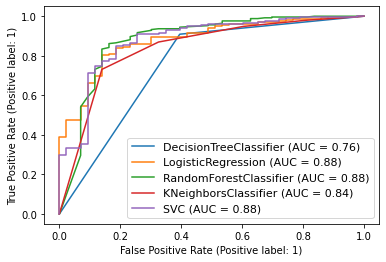

In [67]:
###Plotting ROC AUC Curve:
disp =plot_roc_curve(dtc,x_test,y_test)   
plot_roc_curve(lgr,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax = disp.ax_)

plt.legend(prop={'size': 11},loc = 'lower right')
plt.show()


# Saving the model

In [69]:
import pickle
filename = 'SVM_Classifier_model.pickle'
pickle.dump(svc,open(filename,'wb'))